In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
path = os.listdir('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN')
classes = {'no':0, 'yes':1}

In [58]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [59]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)

In [60]:
np.unique(Y)

array([0, 1])

In [61]:
pd.Series(Y).value_counts()

0    1500
1    1500
dtype: int64

In [62]:
X.shape, X_updated.shape

((3000, 200, 200), (3000, 40000))

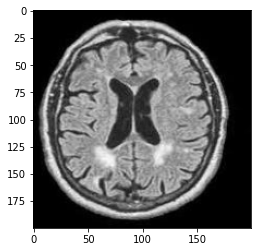

In [63]:
#Visualise the data
plt.imshow(X[0], cmap='gray')

In [64]:
#Prepare data
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3000, 40000)

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
 test_size=.20)

In [66]:
xtrain.shape, xtest.shape

((2400, 40000), (600, 40000))

In [67]:
#Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [68]:
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown="ignore")

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [70]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [71]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [72]:
#Evaluation
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.97


In [73]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))


Training Score: 0.9829166666666667
Testing Score: 0.96


In [74]:
pred = sv.predict(xtest)


In [75]:
misclassified=np.where(ytest!=pred)
misclassified


(array([ 40,  65,  71,  83, 125, 131, 141, 155, 169, 206, 211, 215, 225,
        243, 321, 354, 370, 377, 408, 416, 465, 473, 482, 546]),)

In [76]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  24
1 1


In [77]:
dec = {0:'No', 1:'yes'}

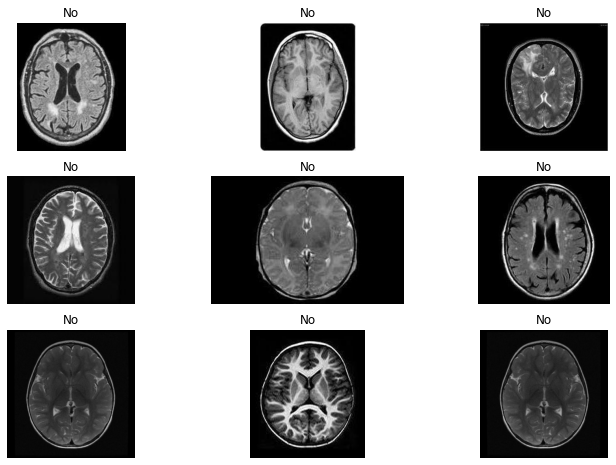

In [86]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN')
c=1
for i in os.listdir('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN/no/')[:9]:
 plt.subplot(3,3,c)
 
 img = cv2.imread('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN/no/'+i,0)
 img1 = cv2.resize(img, (200,200))
 img1 = img1.reshape(1,-1)/255
 p = sv.predict(img1)
 plt.title(dec[p[0]])
 plt.imshow(img, cmap='gray')
 plt.axis('off')
 c+=1

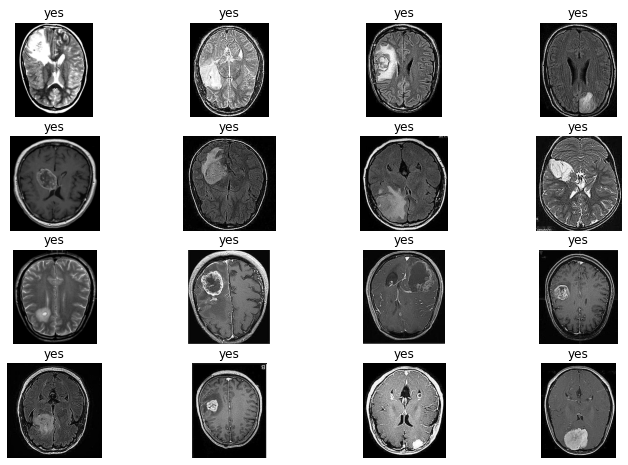

In [89]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN')
c=1
for i in os.listdir('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN/yes/')[:16]:
 plt.subplot(4,4,c)
 
 img = cv2.imread('/content/drive/MyDrive/Br35H-Mask-RCNN/TRAIN/yes/'+i,0)
 img1 = cv2.resize(img, (200,200))
 img1 = img1.reshape(1,-1)/255
 p = sv.predict(img1)
 plt.title(dec[p[0]])
 plt.imshow(img, cmap='gray')
 plt.axis('off')
 c+=1